In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Felhasznált könyvtári függvények dokumentációi

In [2]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

In [3]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or seque

In [4]:
help(std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
       

In [5]:
help(mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

In [6]:
def myCircuit(x0,RC,eps,D,N):
    mu, sigma = 0, 2*sqrt(D*eps) # mean and standard deviation
    eta = np.random.normal(mu, sigma, N) #array of drawn random numbers
                                      #with gaussian distribution
        
    x=[x0] #initial condition
    i=0
    while(i<N): #i=0,1,...N-1
        x.append(x[-1]-(1/RC)*x[-1]*eps+eta[i]) #iteration
        
            
        i+=1
    
    xMean=mean(array(x[-50000:]))
    x2Mean=mean(array(x[-50000:])**2)
    x4Mean=mean(array(x[-50000:])**4)
    
    return array(x),xMean,x2Mean,x4Mean

In [7]:
x0=0.0
RC=1
D=1.05
N=int(1e5)
eps=5e-3

In [8]:
x,xMean,x2Mean,x4Mean=myCircuit(x0,RC,eps,D,N)

In [ ]:
grid = arange(0, len(Idosor)*dt,dt)
sp = np.fft.rfft(Idosor)
freq = np.fft.rfftfreq(len(Idosor),dt)

In [ ]:
plt.plot(freq, abs(sp), '.-',color='blue',lw=0.2)
plt.xlabel('frekvencia', fontsize = 14)
plt.ylabel('spektrum', fontsize = 14)
#xlim(0,0.1)
plt.grid()

In [79]:
x0=0.0
D=1.05
N=int(1e5)
numBins=40

(-0.0001564482043549244, 0.004201941458299926, 5.327174709605141e-05)

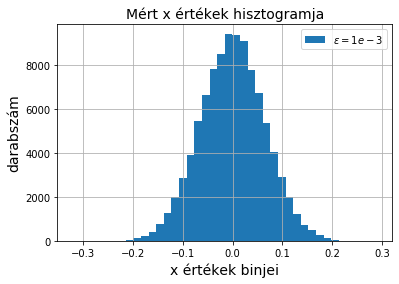

In [80]:
x1,x1Mean,x12Mean,x14Mean=myOsc(x0,1e-3,D,N)
count1, bins1, ignored1 = plt.hist(x1, numBins, label=r'$\varepsilon=1e-3$')
title('Mért x értékek hisztogramja',fontsize=14)
xlabel('x értékek binjei',fontsize=14)
ylabel('darabszám',fontsize=14)
legend()
grid()
savefig('xHist1.png')
x1Mean,x12Mean,x14Mean

(6.375262764559023e-05, 0.008475315326947242, 0.00021448097438114464)

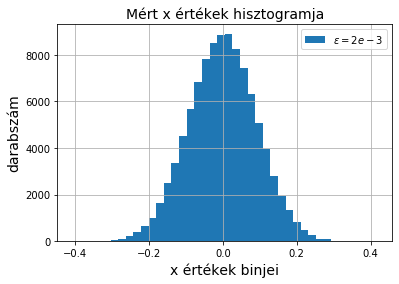

In [81]:
x2,x2Mean,x22Mean,x24Mean=myOsc(x0,2e-3,D,N)
count2, bins2, ignored2= plt.hist(x2, numBins, label=r'$\varepsilon=2e-3$')
title('Mért x értékek hisztogramja',fontsize=14)
xlabel('x értékek binjei',fontsize=14)
ylabel('darabszám',fontsize=14)
legend()
grid()
savefig('xHist2.png')
x2Mean,x22Mean,x24Mean

(0.00023058617644258327, 0.012633704101490695, 0.0004784325196491731)

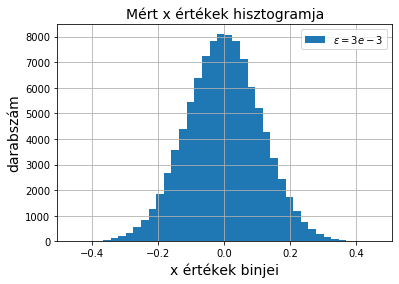

In [82]:
x3,x3Mean,x32Mean,x34Mean=myOsc(x0,3e-3,D,N)
count3, bins3, ignored3= plt.hist(x3, numBins, label=r'$\varepsilon=3e-3$')
title('Mért x értékek hisztogramja',fontsize=14)
xlabel('x értékek binjei',fontsize=14)
ylabel('darabszám',fontsize=14)
legend()
grid()
savefig('xHist3.png')
x3Mean,x32Mean,x34Mean

(0.00028061728811564277, 0.01686787052251368, 0.0008469300083652575)

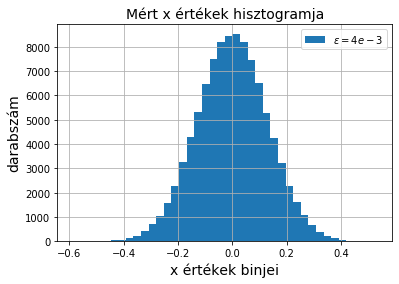

In [83]:
x4,x4Mean,x42Mean,x44Mean=myOsc(x0,4e-3,D,N)
count4, bins4, ignored4= plt.hist(x4, numBins, label=r'$\varepsilon=4e-3$')
title('Mért x értékek hisztogramja',fontsize=14)
xlabel('x értékek binjei',fontsize=14)
ylabel('darabszám',fontsize=14)
legend()
grid()
savefig('xHist4.png')
x4Mean,x42Mean,x44Mean

#### Stacionárius átlagok mérése ötször, végén a szórásokkal: $<x>, <x^{2}>$ és $<x^{4}>$

In [84]:
x0=0.0
D=1.05
N=int(1e5)
eps=1e-3
numBins=40

In [85]:
xMeans=[]
x2Means=[]
x4Means=[]

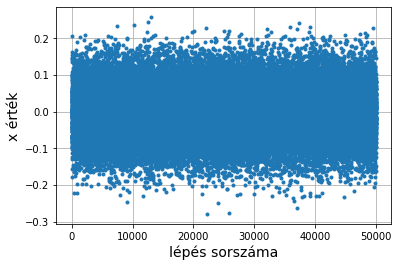

In [86]:
xa,xaMean,xa2Mean,xa4Mean=myOsc(x0,eps,D,N)
xMeans.append(xaMean)
x2Means.append(xa2Mean)
x4Means.append(xa4Mean)
plot(xa[-50000:],'.')
xlabel('lépés sorszáma',fontsize=14)
ylabel('x érték',fontsize=14)
grid()

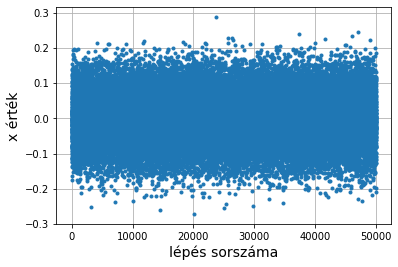

In [87]:
xb,xbMean,xb2Mean,xb4Mean=myOsc(x0,eps,D,N)
xMeans.append(xbMean)
x2Means.append(xb2Mean)
x4Means.append(xb4Mean)
plot(xb[-50000:],'.')
xlabel('lépés sorszáma',fontsize=14)
ylabel('x érték',fontsize=14)
grid()

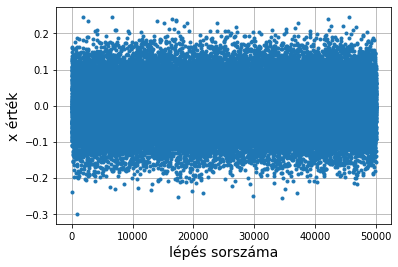

In [88]:
xc,xcMean,xc2Mean,xc4Mean=myOsc(x0,eps,D,N)
xMeans.append(xcMean)
x2Means.append(xc2Mean)
x4Means.append(xc4Mean)
plot(xc[-50000:],'.')
xlabel('lépés sorszáma',fontsize=14)
ylabel('x érték',fontsize=14)
grid()

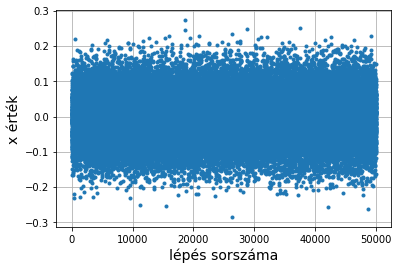

In [89]:
xd,xdMean,xd2Mean,xd4Mean=myOsc(x0,eps,D,N)
xMeans.append(xdMean)
x2Means.append(xd2Mean)
x4Means.append(xd4Mean)
plot(xd[-50000:],'.')
xlabel('lépés sorszáma',fontsize=14)
ylabel('x érték',fontsize=14)
grid()

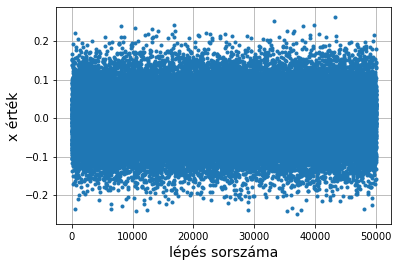

In [90]:
xe,xeMean,xe2Mean,xe4Mean=myOsc(x0,eps,D,N)
xMeans.append(xeMean)
x2Means.append(xe2Mean)
x4Means.append(xe4Mean)
plot(xe[-50000:],'.')
xlabel('lépés sorszáma',fontsize=14)
ylabel('x érték',fontsize=14)
grid()

In [91]:
xMeans

[-0.00014636516343235126,
 0.0002068425463846535,
 -0.00048490022556245426,
 -0.0004451106686695119,
 -3.405895197131153e-05]

In [94]:
std(xMeans) #szórás

0.00025896813721228195

In [100]:
mean(xMeans)#átlag

-0.0001807184926501951

In [92]:
x2Means

[0.0042147717880318455,
 0.0041618584714715814,
 0.004172765034083797,
 0.004197208339757583,
 0.004176381210716645]

In [95]:
std(x2Means)#szórás

1.894253950172218e-05

In [101]:
mean(x2Means)#átlag

0.0041845969688122904

In [93]:
x4Means

[5.318430304105681e-05,
 5.176111543627497e-05,
 5.263778018201263e-05,
 5.284254365106229e-05,
 5.226082123770999e-05]

In [96]:
std(x4Means)#szórás

4.900583375033335e-07

In [102]:
mean(x4Means)#átlag

5.2537312709623334e-05

#### Eloszlás egyensúlyi eloszlás?

In [7]:
x0=0.0
D=1.05
N=int(1e5)
eps=1e-3
numBins=40

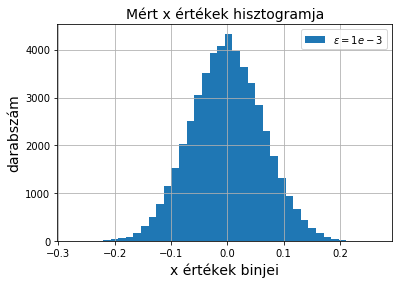

In [8]:
xeq,xeqMean,xeq2Mean,xeq4Mean=myOsc(x0,eps,D,N)
counteq, binseq, ignoredeq = plt.hist(xeq[-50000:], numBins, label=r'$\varepsilon=1e-3$')
title('Mért x értékek hisztogramja',fontsize=14)
xlabel('x értékek binjei',fontsize=14)
ylabel('darabszám',fontsize=14)
legend()
grid()
savefig('xHisteq.png')

In [9]:
binseq

array([-0.27455395, -0.26104543, -0.24753691, -0.23402839, -0.22051988,
       -0.20701136, -0.19350284, -0.17999432, -0.16648581, -0.15297729,
       -0.13946877, -0.12596025, -0.11245174, -0.09894322, -0.0854347 ,
       -0.07192618, -0.05841767, -0.04490915, -0.03140063, -0.01789211,
       -0.0043836 ,  0.00912492,  0.02263344,  0.03614196,  0.04965047,
        0.06315899,  0.07666751,  0.09017603,  0.10368454,  0.11719306,
        0.13070158,  0.1442101 ,  0.15771861,  0.17122713,  0.18473565,
        0.19824417,  0.21175268,  0.2252612 ,  0.23876972,  0.25227824,
        0.26578675])

In [25]:
def func(x,a,b,c):
    
    
    return a*exp(-b*x**2)*exp(-c*x**4)

In [27]:
xeq=sort(xeq)
delta=(max(xeq)-min(xeq))/numBins
i=1
while(i<numBins):
    xeq[(xeq>=(i-1)*delta)&(xeq<i*delta)]
    
    i+=1

0.014741917090683194